Forward in time, backward in space:
$$\phi_j^{n+1} = (1-c)\phi_j^n + c\phi_{j-1}^n$$
in which
$$c=u{{\Delta t}\over{\Delta x}}$$

If $\Delta t = \Delta x/u$ or $c = 1$. The model is not stable

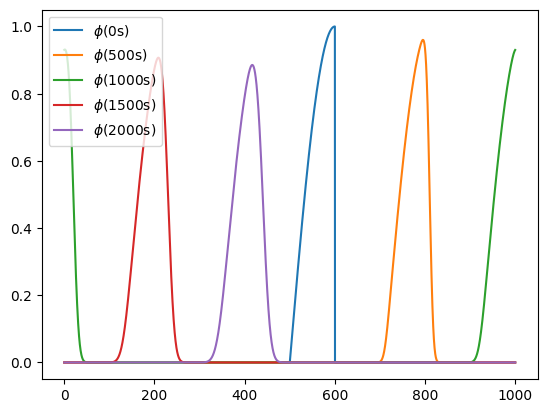

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Initialization
u = 0.42
dx = 0.25
dt = 0.15

# Define distribution function
def funcAdvec(x):
    """Distribution in space"""
    y = [0]*len(x)
    for i in range(0, len(x)):
        if x[i] < 500 or x[i] > 600:
            y[i] = 0
        else:
            y[i] = -np.cos(np.pi*(x[i]-400)/200)
    return y

x = np.arange(0, 1000, dx).tolist()
y = funcAdvec(x)

# Evolution of system in time
class differentialSolve:
    def __init__(self, u, dt, dx, x, y) -> None:
        self.c = u*dt/dx
        self.x = x
        self.y = y
        self.dt = dt
    def ftbs(self):
        ynew = [0]*len(self.y)
        for i in range(0, len(self.y)):
            ynew[i] = (1-self.c)*self.y[i] + self.c*self.y[i-1]
        return ynew
    def ftfs(self):
        ynew = [0]*len(self.y)
        for i in range(0, len(self.y)):
            if i < len(self.y) - 1:
                ynew[i] = (1+self.c)*self.y[i] + self.c*self.y[i+1]
            else:
                ynew[i] = (1+self.c)*self.y[i] - self.c*self.y[0]
        return ynew
    def showftbs(self):
        plt.plot(self.x,self.y, label="$\phi$(0s)")
        self.y = self.ftbs()
        t = 0
        tpoint = 2010
        while t < tpoint:
            t = t + dt
            self.y = self.ftbs()
            if np.mod(t, 500) < dt:
                plt.plot(self.x, self.y, label="$\phi$("+str(math.floor(t))+"s)")
        plt.legend(loc="upper left")
        plt.show()
    def showftfs(self):
        plt.plot(self.x,self.y, label="$\phi$(0s)")
        self.y = self.ftfs()
        t = 0
        tpoint = 2010
        while t < tpoint:
            t = t + dt
            self.y = self.ftbs()
            if np.mod(t, 500) < dt:
                plt.plot(self.x, self.y, label="$\phi$("+str(math.floor(t))+"s)")
        plt.legend(loc="upper left")
        plt.show()

# Run models
# Forward in time and backward in space
evolution = differentialSolve(u, dt, dx, x, y)
evolution.ftbs()
evolution.showftbs()


Forward in time, forward in space:
$$\phi_j^{n+1} = (1+c)\phi_j^n - c\phi_{j+1}^n$$
in which
$$c=u{{\Delta t}\over{\Delta x}}$$

If velocity is greater than 0, the model is uncoditionally unstable

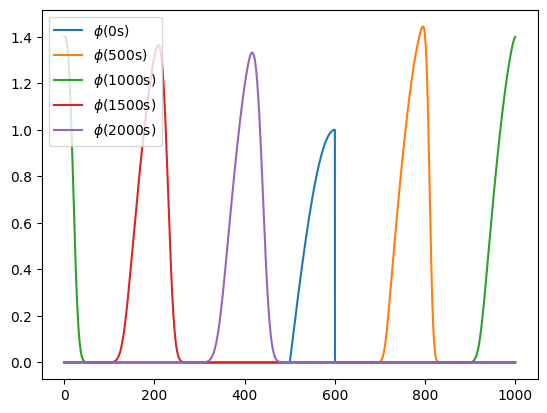

In [2]:
# Forward in time and foward in space
# unstable because velocity is greater than 0
evolution = differentialSolve(u, dt, dx, x, y)
evolution.ftfs()
evolution.showftfs()


If $\Delta t = \Delta x/u$ or $c = 1$. The model is not stable (does not change by time)

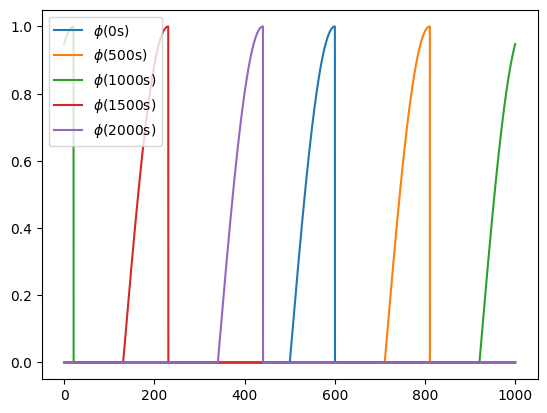

In [3]:
# Forward in time and backward in space
dt = dx/u
evolution = differentialSolve(u, dt, dx, x, y)
evolution.ftbs()
evolution.showftbs()